**The Spark Foundation**

**(Graduate Rotational Internship Program)**

Task 1: Prediction using Supervised Machine Learning

Aim: Predict the percentage of an student based on the number of study hours

**Importing libraries:**

NumPy: Numerical Python for computing

Pandas: Panel DataData Analysis

Matplotlib: for visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Importing data from the source

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Identifying the data shape, information, and other statistical terms

In [3]:
data.shape

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Plotting the data**

[]

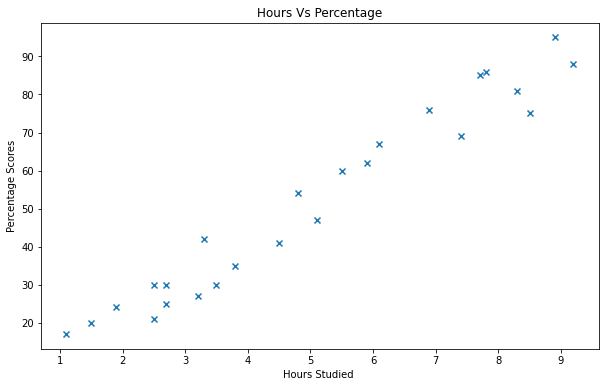

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(data.Hours, data.Scores, marker='x')
plt.title("Hours Vs Percentage")
plt.xlabel("Hours Studied ")
plt.ylabel("Percentage Scores")
plt.plot()

**Feature  and target Selection**

General practice is to split the data into training, validation, and testing.

Training data: Training the machine for creating a hypothesis

Validation data: It evaluates generalization (sample error prediction)

Testing data: Final evaluation (True error estimator)

Note: Here, I am using only Train and test split

In [8]:
X = data.iloc[:, 0].values
Y = data.iloc[:, 1].values

# Splitting the data into 70(Training): 30(Testing)
number_of_samples = len(Y)
random_indices = np.random.permutation(number_of_samples)

# Training Samples
training_samples = int(number_of_samples * 0.8)
X_train = X[random_indices[:training_samples]]
Y_train = Y[random_indices[:training_samples]]

# Testing Samples
testing_samples = int(number_of_samples*0.20)
X_test = X[random_indices[-testing_samples:]]
Y_test = Y[random_indices[-testing_samples:]]

Model Creation

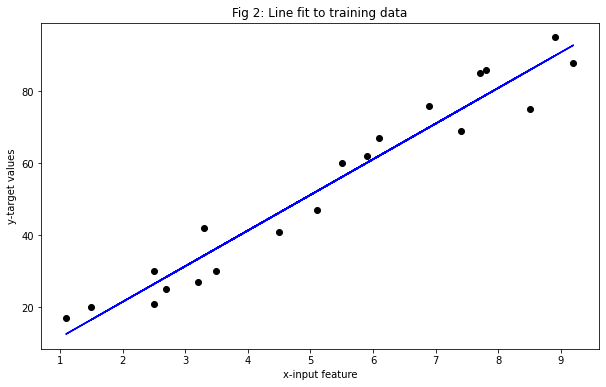

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X_train_for_line_fitting = np.matrix(X_train.reshape(len(X_train),1))
Y_train_for_line_fitting = np.matrix(Y_train.reshape(len(X_train),1))
model.fit(X_train_for_line_fitting, Y_train_for_line_fitting)

# Plot the Regression line
plt.figure(figsize=(10,6))
plt.scatter(X_train,Y_train, color='black')
plt.plot(X.reshape((len(X),1)), model.predict(X.reshape((len(X),1))),color='blue')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 2: Line fit to training data')
plt.show()



In [10]:
dict_actual_pred = {
    'Actual': list(Y_test.reshape(len(Y_test),1)),
    'Predicted' : list(model.predict(X_test.reshape(len(Y_test),1)))
}


df = pd.DataFrame(dict_actual_pred)
df

,Actual,Predicted
0,[24],[20.567059613877372]
1,[30],[28.48996305123242]
2,[35],[39.383955277595604]
3,[54],[49.28758457428941]
4,[81],[83.95028711271775]


Evaluating the model with Mean absoluter Error 

In [11]:
from sklearn import metrics
pred = metrics.mean_absolute_error(np.matrix(Y_test.reshape(len(Y_test),1)), model.predict(np.matrix(X_test.reshape(len(X_test),1))))
print("Mean_absoluter error: ", pred)

Mean_absoluter error:  3.3979270301828293


Problem Statement: What will be predicted score if a student studies for 9.25 hrs/ day?

In [12]:
Hours = np.array([[9.25]])
pred_score = model.predict(Hours)
print(f"If a student studies for {Hours[0,0]} hours a day then he/she would probably score somewhere around {np.round(pred_score[0,0],2)}")

If a student studies for 9.25 hours a day then he/she would probably score somewhere around 93.36
